In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('car-prices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data = pd.get_dummies(df.aspiration, dtype = int)
data

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [9]:
df.drop(columns = ['aspiration'], axis = 1, inplace = True)

In [11]:
df = pd.concat([df, data], axis = 1)
df.head()

,car_ID,symboling,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,std,turbo
0,1,3,alfa-romero giulia,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,2,3,alfa-romero stelvio,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,4,2,audi 100 ls,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,5,2,audi 100ls,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0


In [12]:
df.skew(axis = 0)

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
std                -1.673832
turbo               1.673832
dtype: float64

In [13]:
#Right Skewed log transformation

np.log(1.68)

0.5187937934151675

In [14]:
log_aspiration_turbo=np.log(df['turbo'])

C:\Users\Tanaya Joshi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
log_aspiration_turbo.head()

0   -inf
1   -inf
2   -inf
3   -inf
4   -inf
Name: turbo, dtype: float64

In [16]:
log_aspiration_turbo.skew()

nan

In [18]:
#Original skewed value
df['compressionratio'].skew()

2.6108624576151533

In [19]:
#root transformation
r_compression_ratio=np.sqrt(df['compressionratio'])
r_compression_ratio.head()

0    3.000000
1    3.000000
2    3.000000
3    3.162278
4    2.828427
Name: compressionratio, dtype: float64

In [20]:
r_compression_ratio.skew()

2.5058186324980047

In [21]:
# cube root transformtion x=x^1/3
cube_compression_ratio=np.cbrt(df['compressionratio'])
cube_compression_ratio.head(5)

0    2.080084
1    2.080084
2    2.080084
3    2.154435
4    2.000000
Name: compressionratio, dtype: float64

In [22]:
cube_compression_ratio.skew()

2.460264938869971

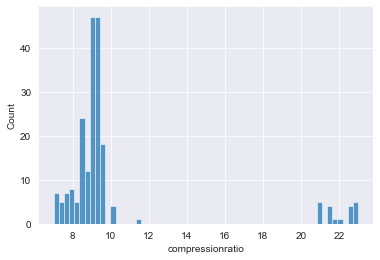

In [64]:
sns.histplot(df["compressionratio"])
plt.show()

In [26]:
#Reciprocals transformation x=1/x
reci_compression_ratio=np.reciprocal(df['compressionratio'])
reci_compression_ratio.head(5)

0    0.111111
1    0.111111
2    0.111111
3    0.100000
4    0.125000
Name: compressionratio, dtype: float64

In [27]:
reci_compression_ratio.skew()

-1.8281510291513177

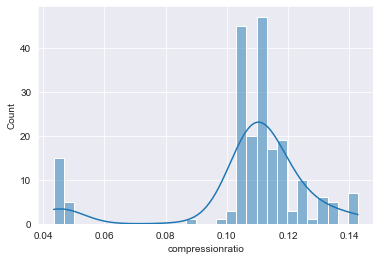

In [63]:
sns.histplot(reci_compression_ratio, kde = True)
plt.show()

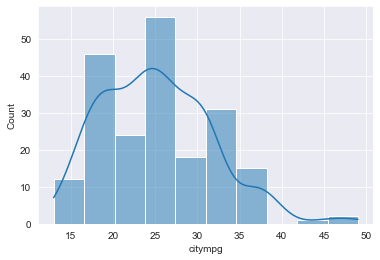

In [62]:
sns.histplot(df["citympg"], kde = True)
plt.show()

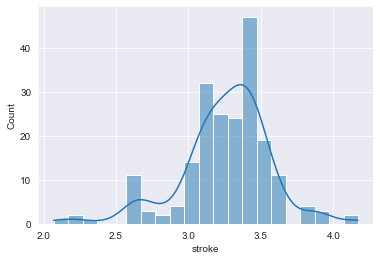

In [61]:
sns.histplot(df["stroke"], kde = True)
plt.show()

In [31]:
df['stroke'].skew()

-0.6897045784233837

In [32]:
#Square transformation x to x^2
square_stroke=np.square(df['stroke'])
square_stroke.head(5)

0     7.1824
1     7.1824
2    12.0409
3    11.5600
4    11.5600
Name: stroke, dtype: float64

In [33]:
square_stroke.skew()

-0.14982250353049908

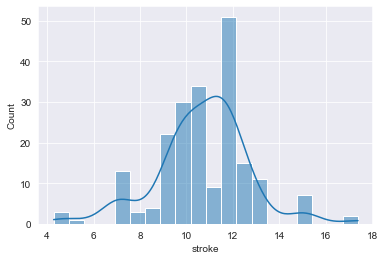

In [60]:
sns.histplot(square_stroke, kde = True)
plt.show()

In [35]:
#cubes transformation x to x^3
cubes_stroke=np.power(df['stroke'],3)
cubes_stroke.head(5)

0    19.248832
1    19.248832
2    41.781923
3    39.304000
4    39.304000
Name: stroke, dtype: float64

In [36]:
cubes_stroke.skew()

0.3760293135133823

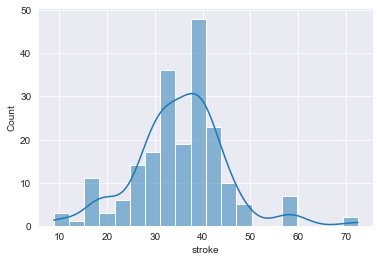

In [59]:
sns.histplot(cubes_stroke, kde = True)
plt.show()

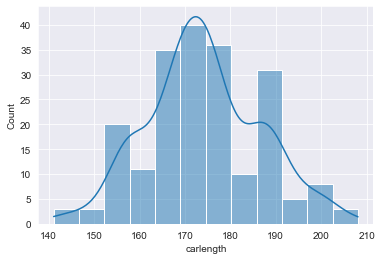

In [58]:
sns.histplot(df['carlength'], kde = True)
plt.show()

In [40]:
#Converting to normal distribution
df.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
std                -1.673832
turbo               1.673832
dtype: float64

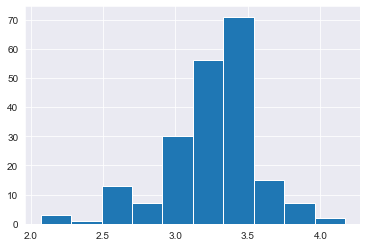

In [57]:
df.stroke.hist()
plt.show()

In [43]:
#Moderately negatively Skewed i.e does not follow a normal distribution

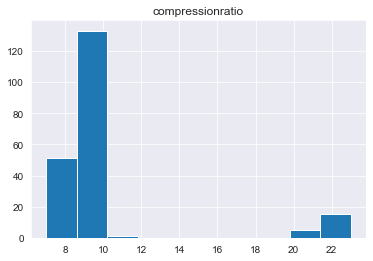

In [44]:
df.hist('compressionratio')
plt.show()

In [45]:
#Highly positive Skewed i.e does not follow a normal distribution

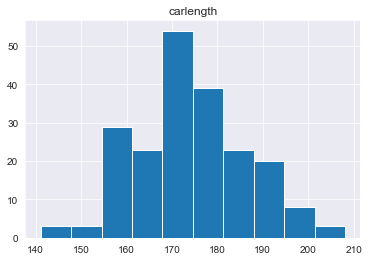

In [46]:
df.hist('carlength')
plt.show()

In [47]:
#Follows a normal distribution

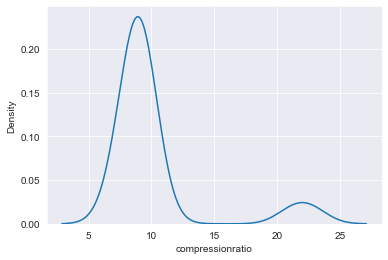

In [49]:
sns.kdeplot(df['compressionratio'])
plt.show()

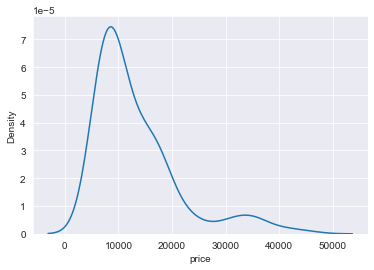

In [50]:
sns.kdeplot(df['price'])
plt.show()
#highly positively skewed

In [52]:
import scipy.stats as stats
import pylab

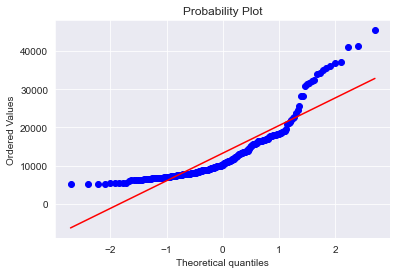

In [54]:
stats.probplot(df.price,plot=pylab)
plt.show()
#not normal distribution

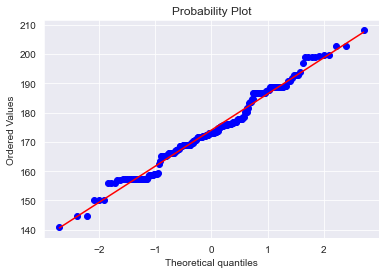

In [56]:
#normal distribution
stats.probplot(df.carlength,plot=pylab)
plt.show()